In [168]:
import pandas as pd
import numpy as np
import os
import re
from functools import reduce
import datetime as dt


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [31]:
path ='../Hakmin/raw'
dpath = '../dataset'

In [38]:
file_list = os.listdir(path)

In [39]:
file_list.sort()
file_list = file_list[4:]
file_list

['선수정보_2018.csv', '선수정보_2019.csv', '선수정보_2020.csv', '선수정보_2021.csv']

In [8]:
baseball=[]
for ls in file_list:
    baseball.append(pd.read_csv(os.path.join(path,ls), encoding='utf-8'))
    

In [24]:
for i in range(len(file_list)):
    baseball[i]['year']= int(file_list[i][5:9])

In [42]:
sum([baseball[i].shape[0] for i in range(4)])

63452

In [85]:
tot_baseball = reduce(lambda left, right: pd.concat([left,right]), baseball)

In [86]:
tot_baseball=tot_baseball.reset_index(drop=True)

In [87]:
tot_baseball['상대']=tot_baseball['상대'].str.replace(pat=r'[^\w]',repl='', regex=True)

In [88]:
tot_baseball['상대'].value_counts()

두산     6435
삼성     6369
한화     6355
NC     6309
LG     6301
KIA    6274
롯데     6268
KT     6205
SK     5294
키움     4740
넥센     1812
SSG    1090
Name: 상대, dtype: int64

In [89]:
tot_baseball['상대'].value_counts()

두산     6435
삼성     6369
한화     6355
NC     6309
LG     6301
KIA    6274
롯데     6268
KT     6205
SK     5294
키움     4740
넥센     1812
SSG    1090
Name: 상대, dtype: int64

In [33]:
os.path.join(dpath, 'total_baseball.csv')

'../dataset/total_baseball.csv'

In [157]:
tot_baseball = pd.read_csv(os.path.join(dpath, 'total_baseball.csv'))

In [158]:
tot_baseball

,이름,날짜,상대,결과,점수,타순,P,선발,타수,득점,...,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA,year
0,정훈,04-29,한화,W,4:3,7,3B,1,2,0,...,1,0.000,0.000,0.000,0.000,8,1.51,-0.72,-0.046,2018
1,정훈,05-02,KIA,L,6:12,6,1B,1,4,0,...,0,0.125,0.111,0.250,0.361,12,1.09,-0.33,-0.032,2018
2,정훈,05-04,SK,L,4:5,9,PH,0,1,1,...,0,0.300,0.273,0.800,1.073,3,0.44,1.00,0.025,2018
3,정훈,05-08,LG,W,4:2,5,PH,0,1,0,...,0,0.333,0.308,0.750,1.058,6,0.49,-0.26,-0.013,2018
4,정훈,05-10,LG,W,7:2,9,PH,0,1,0,...,0,0.333,0.313,0.667,0.979,3,0.02,-0.26,-0.001,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63255,김상수,08-27,LG,L,1:3,9,2B,1,3,0,...,0,0.221,0.310,0.264,0.575,13,1.14,-0.03,0.031,2021
63256,김상수,08-29,KT,L,3:8,9,2B,1,3,0,...,0,0.223,0.312,0.265,0.577,18,0.50,0.66,0.046,2021
63257,김상수,09-01,키움,W,7:1,9,2B,1,2,2,...,0,0.227,0.320,0.268,0.588,18,0.67,2.07,0.098,2021
63258,김상수,09-03,KIA,W,9:3,6,2B,1,3,1,...,0,0.228,0.322,0.268,0.590,11,0.57,0.90,0.060,2021


In [159]:
tot_baseball['date']=(tot_baseball['year'].astype(str) + '-' +tot_baseball['날짜']).apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d'))

In [160]:
tot_baseball['month'] = tot_baseball['날짜'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%m-%d')).dt.month

In [161]:
tot_baseball.columns

Index(['이름', '날짜', '상대', '결과', '점수', '타순', 'P', '선발', '타수', '득점', '안타', '2타',
       '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타',
       '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA', 'year',
       'date', 'month'],
      dtype='object')

In [162]:
on_base = ['안타','2타','3타','홈런','사구','볼넷','고4']
out = ['병살','삼진','희타']
etc = ['타수','도루','투구']
demo =['이름', 'year', 'month', 'date', '상대', '결과', '점수', '선발'] 





In [404]:
dataset=tot_baseball.loc[:,  demo + on_base + out + etc].sort_values(by='date')
dataset

,이름,year,month,date,상대,결과,점수,선발,안타,2타,...,홈런,사구,볼넷,고4,병살,삼진,희타,타수,도루,투구
1267,류지혁,2018,3,2018-03-24,삼성,L,3:6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14728,이상호,2018,3,2018-03-24,LG,W,4:2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17150,박건우,2018,3,2018-03-24,삼성,L,3:6,1,0,0,...,0,0,0,0,0,0,0,4,0,14
5296,김동엽,2018,3,2018-03-24,롯데,W,6:5,1,2,0,...,1,0,0,0,0,1,0,4,0,13
8308,박용택,2018,3,2018-03-24,NC,L,2:4,1,1,0,...,0,0,0,0,1,2,0,4,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62529,페르난데스,2021,9,2021-09-05,삼성,W,6:5,1,1,0,...,0,0,0,0,0,1,0,5,0,14
62956,김성현,2021,9,2021-09-05,키움,L,8:10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62701,이원석,2021,9,2021-09-05,두산,L,5:6,1,1,0,...,0,0,1,0,1,0,0,4,0,16
62615,박병호,2021,9,2021-09-05,SSG,W,10:8,1,0,0,...,0,0,0,0,0,1,0,5,0,22


In [408]:
#dataset.to_csv(os.path.join(dpath, 'feature_baseball.csv'),index=False)

In [530]:
WINDOW_SIZE = 5
game_base = dt.timedelta(35)

In [531]:
def make_time_series(df,window_size):
    
    barell = ['2타','3타','홈런']
    
    on_base = ['안타','2타','3타','홈런','사구','볼넷','고4']
    out = ['병살','삼진','희타']
    etc = ['타수','도루','투구']
    
    is_bin = ['선발']


    # for calcaul
    total_base =['타수','볼넷','고4','사구','희타']
    hit = ['안타','2타','3타','홈런']
    
    sample_list = []
    
    for i in range(1,len(df),window_size):
        
        single = df[-i:-(i+window_size):-1].groupby(['이름','year'])[on_base+out+etc].sum()
        single['gap'] = df[-i:-(i+window_size):-1].iloc[0,3] - df[-i:-(i+window_size):-1].iloc[-1,3]
        
        single['num_game'] = df[-i:-(i+window_size):-1].shape[0]
        single['on_base']= single[on_base].sum(axis=1)/single[total_base].sum(axis=1)
        single['slg'] = (single[hit] * [1,2,3,4]).sum(axis=1)/single['타수']
        sample_list.append(single)
        
        
    result = pd.concat(sample_list).reset_index()
    result.index = ['t'+str(i) for i in range(1,len(result)+1)]
    return result
    

In [532]:
base_2021=dataset[(dataset['year']==2021)]

In [533]:
total_time_seires = []

In [536]:
players= base_2021['이름'].value_counts().keys().to_list()
for player in players:
    sample_df = dataset[(dataset['year']==2021)&(dataset['이름']==player)]
    total_time_seires.append(make_time_series(sample_df, WINDOW_SIZE))

In [537]:
temp = pd.concat(total_time_seires)

In [538]:
temp

,이름,year,안타,2타,3타,홈런,사구,볼넷,고4,병살,삼진,희타,타수,도루,투구,gap,num_game,on_base,slg
t1,김혜성,2021,2,0,0,0,0,3,0,0,4,0,12,2,61,5 days,5,0.333333,0.166667
t2,김혜성,2021,7,0,0,0,0,2,1,0,3,0,22,1,94,5 days,5,0.400000,0.318182
t3,김혜성,2021,5,1,0,0,0,4,0,0,2,0,16,0,79,6 days,5,0.500000,0.437500
t4,김혜성,2021,5,1,0,0,0,5,1,0,3,0,17,0,94,36 days,5,0.521739,0.411765
t5,김혜성,2021,3,0,0,0,0,2,0,0,3,0,20,2,77,5 days,5,0.227273,0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t1,이진영,2021,3,0,1,0,2,1,0,0,2,0,9,1,54,32 days,5,0.583333,0.666667
t2,이진영,2021,3,1,0,1,1,2,0,0,10,0,14,0,71,10 days,5,0.470588,0.642857
t3,이진영,2021,2,1,0,1,1,0,0,0,7,0,12,0,64,24 days,3,0.384615,0.666667
t1,김건형,2021,2,1,0,0,0,2,0,0,3,0,15,0,82,7 days,5,0.294118,0.266667


<AxesSubplot:>

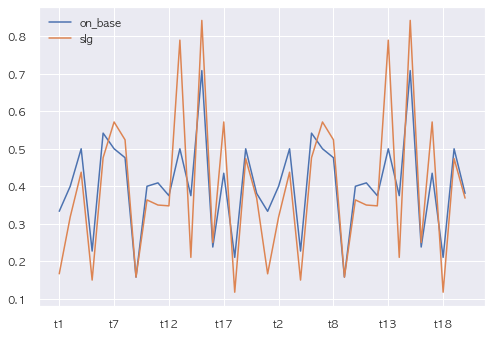

In [539]:
temp[(temp.gap < game_base)&(temp['이름']==players[0])][['on_base','slg']].plot()

<AxesSubplot:>

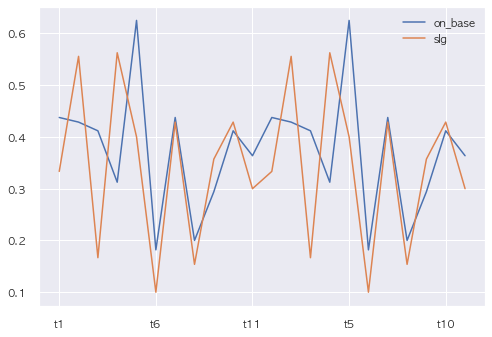

In [540]:
temp[(temp.gap < game_base)&(temp['이름']==players[100])][['on_base','slg']].plot()

<AxesSubplot:>

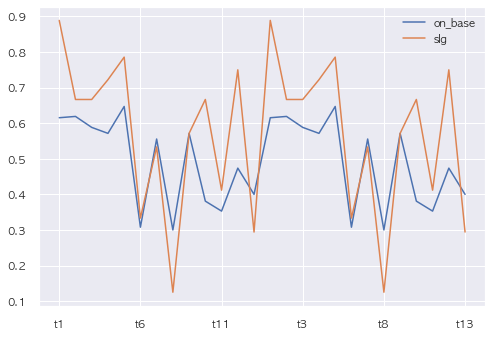

In [541]:
temp[(temp.gap < game_base)&(temp['이름']==players[80])][['on_base','slg']].plot()

<AxesSubplot:>

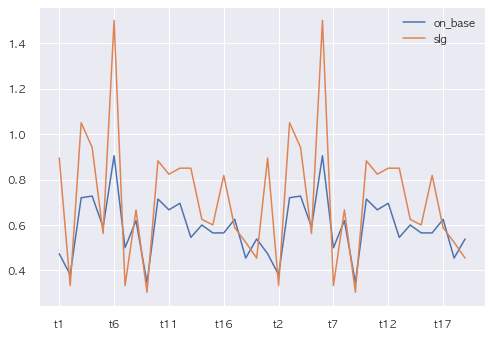

In [542]:
temp[(temp.gap < game_base)&(temp['이름']=='강백호')][['on_base','slg']].plot()

<AxesSubplot:>

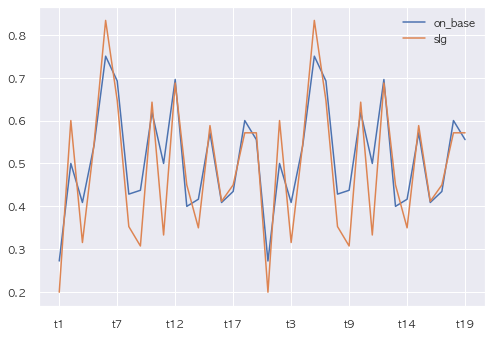

In [543]:
temp[(temp.gap < game_base)&(temp['이름']=='홍창기')][['on_base','slg']].plot()

In [545]:
temp.gap.describe().T

count                         4240
mean     8 days 04:07:14.716981132
std      9 days 10:29:19.512919163
min                1 days 00:00:00
25%                5 days 00:00:00
50%                5 days 00:00:00
75%                7 days 00:00:00
max               83 days 00:00:00
Name: gap, dtype: object

In [547]:
temp[(temp.gap < game_base)]

,이름,year,안타,2타,3타,홈런,사구,볼넷,고4,병살,삼진,희타,타수,도루,투구,gap,num_game,on_base,slg
t1,김혜성,2021,2,0,0,0,0,3,0,0,4,0,12,2,61,5 days,5,0.333333,0.166667
t2,김혜성,2021,7,0,0,0,0,2,1,0,3,0,22,1,94,5 days,5,0.400000,0.318182
t3,김혜성,2021,5,1,0,0,0,4,0,0,2,0,16,0,79,6 days,5,0.500000,0.437500
t5,김혜성,2021,3,0,0,0,0,2,0,0,3,0,20,2,77,5 days,5,0.227273,0.150000
t6,김혜성,2021,10,0,0,0,0,3,0,0,3,0,21,2,94,5 days,5,0.541667,0.476190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t1,이진영,2021,3,0,1,0,2,1,0,0,2,0,9,1,54,32 days,5,0.583333,0.666667
t2,이진영,2021,3,1,0,1,1,2,0,0,10,0,14,0,71,10 days,5,0.470588,0.642857
t3,이진영,2021,2,1,0,1,1,0,0,0,7,0,12,0,64,24 days,3,0.384615,0.666667
t1,김건형,2021,2,1,0,0,0,2,0,0,3,0,15,0,82,7 days,5,0.294118,0.266667


In [548]:
a=temp[(temp.gap < game_base)].reset_index().groupby('이름')['index'].count().gt(10).items()


In [549]:
b=[name for name, flag in a if flag==True]
b

['강민호',
 '강백호',
 '강승호',
 '강진성',
 '강한울',
 '고종욱',
 '구자욱',
 '권동진',
 '권희동',
 '김강민',
 '김규성',
 '김동엽',
 '김민성',
 '김민수',
 '김민식',
 '김민하',
 '김민혁',
 '김병희',
 '김상수',
 '김선빈',
 '김성현',
 '김용의',
 '김웅빈',
 '김인태',
 '김재성',
 '김재유',
 '김재호',
 '김재환',
 '김준태',
 '김지찬',
 '김찬형',
 '김태군',
 '김태진',
 '김태훈',
 '김헌곤',
 '김현수',
 '김혜성',
 '김호령',
 '김호재',
 '나성범',
 '나승엽',
 '노수광',
 '노시환',
 '노진혁',
 '도태훈',
 '라모스',
 '로맥',
 '류지혁',
 '마차도',
 '문보경',
 '문상철',
 '박건우',
 '박경수',
 '박계범',
 '박동원',
 '박민우',
 '박병호',
 '박석민',
 '박성한',
 '박세혁',
 '박정현',
 '박준영',
 '박찬호',
 '박해민',
 '배성근',
 '배정대',
 '서건창',
 '손아섭',
 '송민섭',
 '송우현',
 '신본기',
 '신용수',
 '심우준',
 '안재석',
 '안치홍',
 '알몬테',
 '알테어',
 '양석환',
 '양의지',
 '오윤석',
 '오재원',
 '오재일',
 '오지환',
 '오태곤',
 '유강남',
 '유장혁',
 '유한준',
 '이대호',
 '이명기',
 '이병규',
 '이성열',
 '이영빈',
 '이용규',
 '이우성',
 '이원석',
 '이원재',
 '이재원',
 '이정후',
 '이정훈',
 '이지영',
 '이창진',
 '이천웅',
 '이학주',
 '이형종',
 '이홍구',
 '이흥련',
 '임종찬',
 '장성우',
 '장승현',
 '장운호',
 '전병우',
 '전준우',
 '정수빈',
 '정은원',
 '정의윤',
 '정주현',
 '정진기',
 '정진호',
 '정현',
 '정훈',
 '조수행',
 '조용호',
 '조한민',
 '지석훈',
 '지시완',
 '채

In [550]:
len(b)

149

In [575]:
temp[(temp.gap < game_base)&(temp['이름']==b[0])]['on_base'].to_frame().T.iloc[:,:10]

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
on_base,0.533333,0.666667,0.35,0.333333,0.478261,0.5,0.391304,0.4375,0.588235,0.428571


In [581]:
temp[(temp.gap < game_base)&(temp['이름']==b[20])]['on_base'].to_frame().T.iloc[:,:10]

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
on_base,0.142857,0.647059,0.058824,0.444444,0.6,0.411765,0.588235,0.0,0.25,0.416667


In [570]:
['t'+str(i) for i in range(1,11)]

['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']

In [564]:
sequence = []
for name in b:
    sequence.append(temp[(temp.gap < game_base)&(temp['이름']==name)]['on_base'].to_frame().T.iloc[:,:10])

In [567]:
tot_seq = reduce(lambda left, right: pd.concat([left,right]), sequence)

ValueError: Plan shapes are not aligned